# Convergence FEM / PINNs+Corr

In [58]:
# sélection du cas test
testcase = 2
version = 1
param_num = 2
high_degree = 10

In [59]:
assert testcase in [1,2]
if testcase == 1:
    assert version in [1,2,4]
else:
    assert version == 1

**Idée :** On se place ici dans un des cas tests proposés : TestCase1,1_v2,2.

On cherche à vérifier les convergences obtenues pour

- FEM standard
- le PINNs + Correction par addition

On choisira d'effectuer ces convergences en P1,P2 et P3

## Imports + Load

In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import os
import dolfin as df

from modfenics.solver_fem.PoissonDirSquareFEMSolver import PoissonDirSquareFEMSolver
from modfenics.utils import get_param,compute_slope
from modfenics.error_estimations.fem import compute_error_estimations_fem_deg,compute_error_estimations_fem_all
from modfenics.error_estimations.add import compute_error_estimations_Corr_deg,compute_error_estimations_Corr_all,plot_Corr_vs_FEM
from testcases.utils import create_tree

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [62]:
if testcase == 1:
    if version == 1:
        from testcases.networks.test_2D.test_1.test_1_v1 import Run_laplacian2D,Poisson_2D
    elif version == 2:
        from testcases.networks.test_2D.test_1.test_1_v2 import Run_laplacian2D,Poisson_2D
    else:
        raise ValueError("Version not found")
    from testcases.problem.problem_2D import TestCase1
    problem = TestCase1(version=version)
elif testcase == 2:
    from testcases.networks.test_2D.test_2.test_2_v1 import Run_laplacian2D,Poisson_2D
    from testcases.problem.problem_2D import TestCase2
    problem = TestCase2(version=version)

result_dir = "../../../results/fenics/test_2D/testcase"+str(testcase)+"/version"+str(version)
result_dir += "/cvg/"
create_tree(result_dir)

0.0   1.5
0.0   10.0
init
init
>> load network /home/flecourtier/Bureau/Article1/code/networks/test_2D/test_fe2.pth
network loaded
Error  tensor([0.0191])


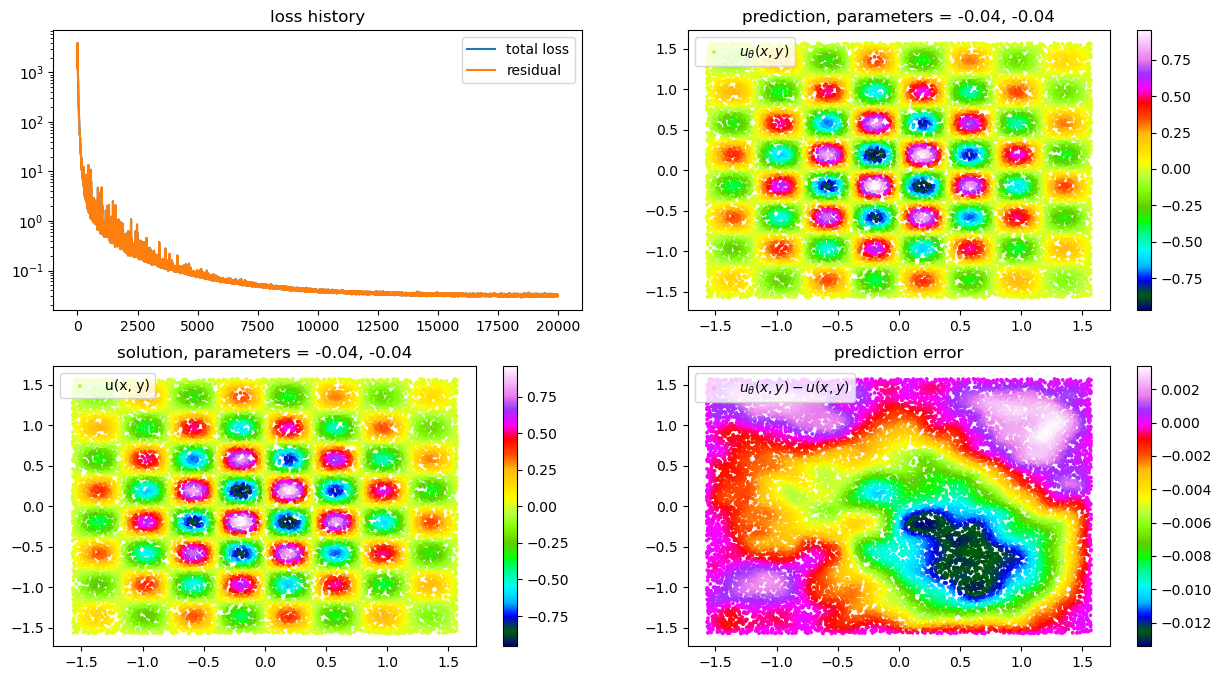

In [63]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Convergence FEM

In [64]:
# degree = 2
# df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_estimations_fem_deg(param_num,problem,degree,high_degree,new_run=False,result_dir=result_dir)

## Read csv file ../../../results/fenics/test_2D/testcase2/version1/cvg/FEM_case2_v1_param2_degree1.csv
## Read csv file ../../../results/fenics/test_2D/testcase2/version1/cvg/FEM_case2_v1_param2_degree2.csv
## Read csv file ../../../results/fenics/test_2D/testcase2/version1/cvg/FEM_case2_v1_param2_degree3.csv


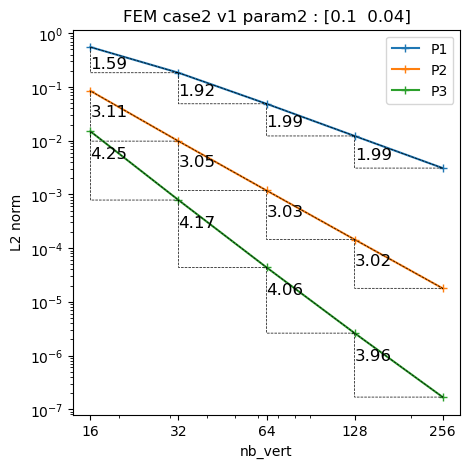

In [65]:
compute_error_estimations_fem_all(param_num,problem,high_degree,new_run=False,result_dir=result_dir,plot_cvg=True)

## Convergence PINNs+Corr

In [66]:
# degree = 2
# df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_estimations_Corr_deg(param_num,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Read csv file ../../../results/fenics/test_2D/testcase2/version1/cvg/Corr_case2_v1_param2_degree1.csv
## Read csv file ../../../results/fenics/test_2D/testcase2/version1/cvg/Corr_case2_v1_param2_degree2.csv
## Read csv file ../../../results/fenics/test_2D/testcase2/version1/cvg/Corr_case2_v1_param2_degree3.csv


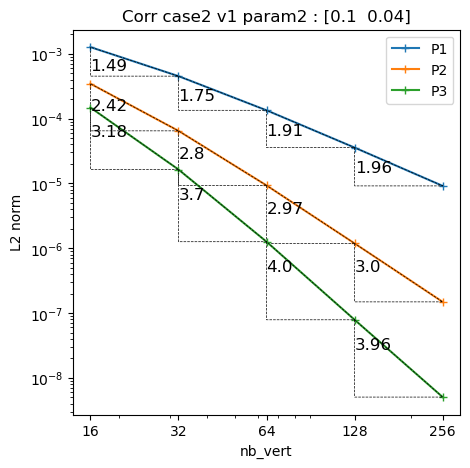

In [67]:
compute_error_estimations_Corr_all(param_num,problem,high_degree,u_theta,new_run=False,result_dir=result_dir,plot_cvg=True)

## Plots

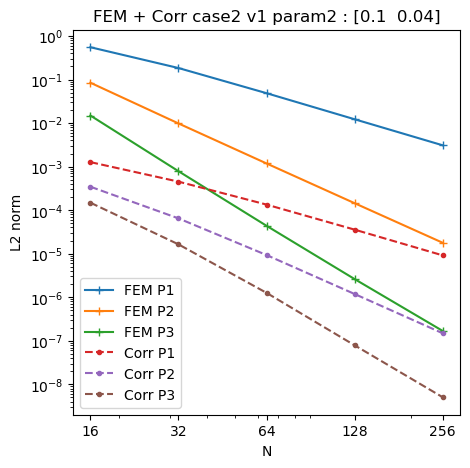

In [68]:
plot_Corr_vs_FEM(param_num,problem,result_dir=result_dir)